# Análise de Remuneração de Docentes por Regiões do Brasil

Este notebook realiza uma análise detalhada dos dados de remuneração de docentes do Brasil, organizados por região, rede de ensino e formação, com base nos dados do ano de 2020.

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Para exibir todas as colunas e linhas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 1. Carregamento e Preparação dos Dados

Vamos carregar os dados do arquivo Excel e fazer o tratamento inicial.

In [2]:
# Definir o caminho do arquivo
arquivo = 'datasets/RemuneracaoDocentesUF2020.xlsx'

# Verificar se o arquivo existe
if not os.path.exists(arquivo):
    print(f"Arquivo {arquivo} não encontrado!")
else:
    # Carregar o arquivo, pulando as primeiras linhas para chegar aos dados reais
    df = pd.read_excel(arquivo, skiprows=3)
    
    # Renomear as colunas baseado na inspeção feita anteriormente
    colunas = [
        'Ano', 'Região', 'UF', 'Rede', 'Formação', 
        'Rem_Média', 'Rem_Mediana', 'Rem_Desvio', 'CV', 
        'Rem_40h_Média', 'Rem_40h_Mediana', 'Rem_40h_Desvio', 'CV_40h', 'Rem_40h_Final'
    ]
    
    # Assegurar que temos o número correto de colunas
    if len(df.columns) == len(colunas):
        df.columns = colunas
    else:
        print("Aviso: Número de colunas diferente do esperado!")
        print(f"Esperado: {len(colunas)}, Encontrado: {len(df.columns)}")
    
    # Mostrar as primeiras linhas
    df.head()

In [3]:
# Verificar informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ano              243 non-null    int64  
 1   Região           243 non-null    object 
 2   UF               243 non-null    object 
 3   Rede             243 non-null    object 
 4   Formação         243 non-null    object 
 5   Rem_Média        243 non-null    int64  
 6   Rem_Mediana      243 non-null    float64
 7   Rem_Desvio       243 non-null    float64
 8   CV               243 non-null    float64
 9   Rem_40h_Média    243 non-null    float64
 10  Rem_40h_Mediana  243 non-null    float64
 11  Rem_40h_Desvio   243 non-null    float64
 12  CV_40h           243 non-null    float64
 13  Rem_40h_Final    243 non-null    float64
dtypes: float64(8), int64(2), object(4)
memory usage: 26.7+ KB


In [4]:
# Converter colunas numéricas
colunas_numericas = ['Rem_Média', 'Rem_Mediana', 'Rem_Desvio', 'CV', 
                     'Rem_40h_Média', 'Rem_40h_Mediana', 'Rem_40h_Desvio', 'CV_40h', 'Rem_40h_Final']

for col in colunas_numericas:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Remover linhas sem região
df = df.dropna(subset=['Região'])

# Estatísticas descritivas
df.describe()

,Ano,Rem_Média,Rem_Mediana,Rem_Desvio,CV,Rem_40h_Média,Rem_40h_Mediana,Rem_40h_Desvio,CV_40h,Rem_40h_Final
count,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,2020.0,25602.995885,84.160797,1974.887745,2639.713133,3009.456255,3658.051272,1599.360890,30.306443,4029.650453
std,0.0,45469.706392,15.559785,1009.459823,1212.008989,1235.970423,1560.244522,612.458731,4.998773,1673.706531
min,2020.0,24.000000,34.108040,701.970000,950.010000,1043.995000,1159.680000,474.437200,19.086570,1273.815000
25%,2020.0,2492.500000,72.831365,1194.770000,1698.045000,2041.723500,2527.207500,1103.448000,26.871170,2831.030500
50%,2020.0,9724.000000,90.622760,1730.740000,2416.555000,2788.408000,3396.190000,1508.623000,30.005650,3807.174000
75%,2020.0,26721.000000,96.689870,2521.900000,3255.855000,3683.201000,4475.585000,2126.650500,33.626205,4974.333000
max,2020.0,356011.000000,100.000000,5019.570000,6042.680000,6551.233000,8477.290000,3504.080000,40.138680,11466.520000


## 2. Análise por Região

Vamos examinar as diferenças de remuneração entre as regiões do Brasil.

In [5]:
# Verificar as regiões disponíveis
print("Regiões disponíveis:")
print(df['Região'].unique())

# Quantidade de registros por região
contagem_por_regiao = df['Região'].value_counts()
print("\nQuantidade de registros por região:")
print(contagem_por_regiao)

Regiões disponíveis:
['Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-Oeste']

Quantidade de registros por região:
Região
Nordeste        81
Norte           63
Sudeste         36
Centro-Oeste    36
Sul             27
Name: count, dtype: int64


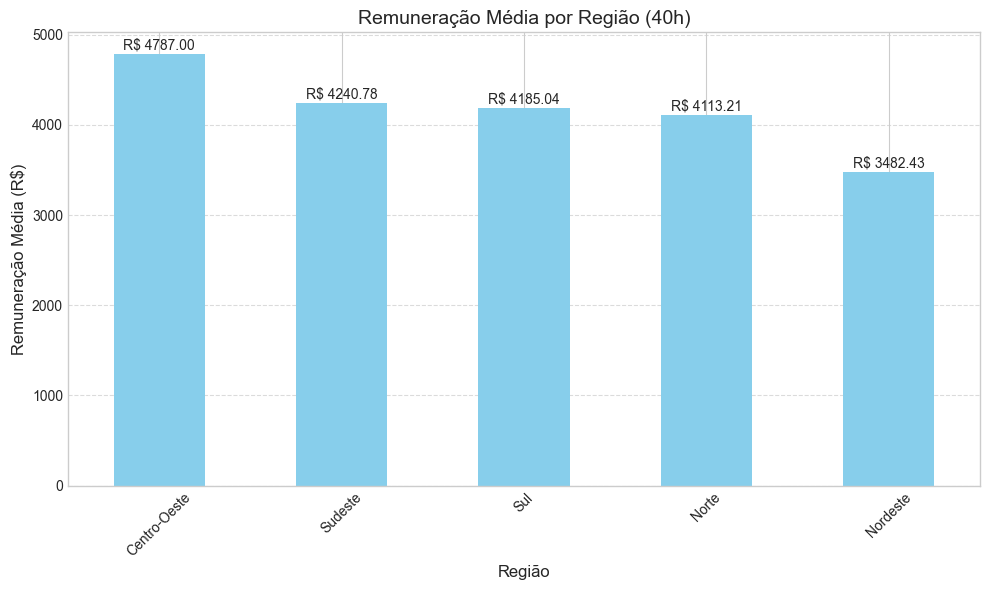

In [6]:
# Remuneração média por região
media_por_regiao = df.groupby('Região')['Rem_40h_Final'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
media_por_regiao.plot(kind='bar', color='skyblue')
plt.title('Remuneração Média por Região (40h)', fontsize=14)
plt.xlabel('Região')
plt.ylabel('Remuneração Média (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores nas barras
for i, valor in enumerate(media_por_regiao):
    plt.text(i, valor + 50, f'R$ {valor:.2f}', ha='center')

plt.tight_layout()
plt.show()

## 3. Análise por Região e Rede de Ensino

Agora vamos analisar as diferenças entre redes de ensino (pública, privada, estadual, etc.) em cada região.

In [7]:
# Verificar as redes de ensino disponíveis
print("Redes de ensino:")
print(df['Rede'].unique())

Redes de ensino:
['Estadual' 'Privada' 'Pública']


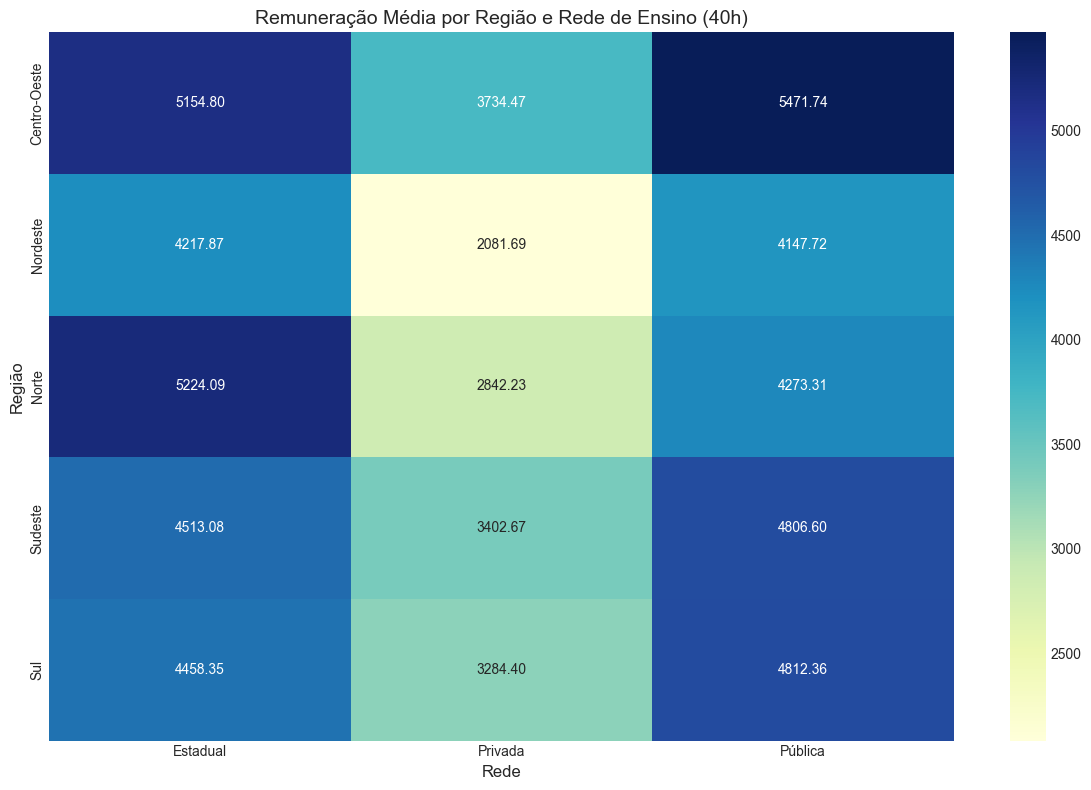

In [8]:
# Remuneração média por região e rede de ensino
pivot_regiao_rede = df.pivot_table(index='Região', columns='Rede', values='Rem_40h_Final', aggfunc='mean')

# Visualizar com heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_regiao_rede, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Remuneração Média por Região e Rede de Ensino (40h)', fontsize=14)
plt.tight_layout()
plt.show()

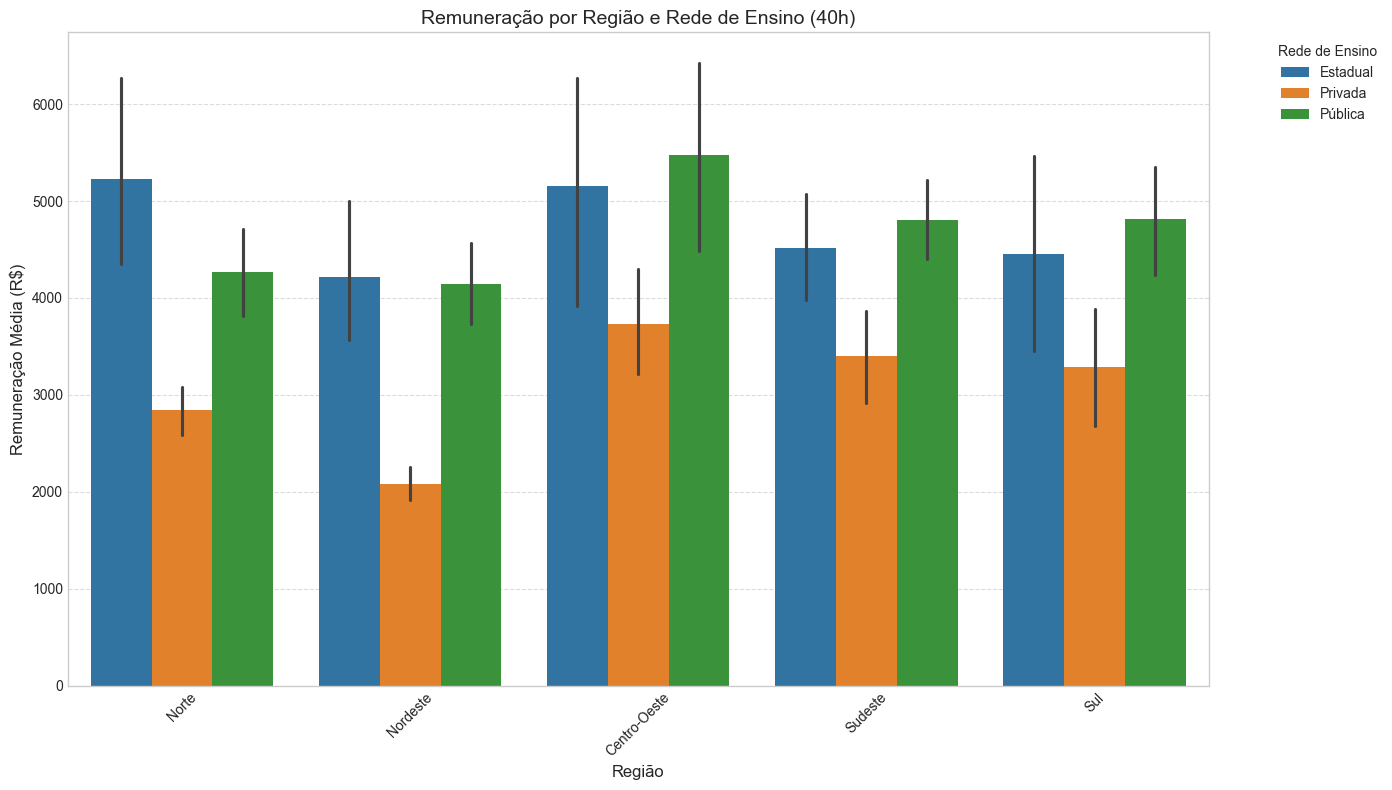

In [9]:
# Visualização em barras agrupadas por região e rede
plt.figure(figsize=(14, 8))
ordem_regioes = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']
order_regioes = [r for r in ordem_regioes if r in df['Região'].unique()]

sns.barplot(x='Região', y='Rem_40h_Final', hue='Rede', data=df, order=order_regioes)
plt.title('Remuneração por Região e Rede de Ensino (40h)', fontsize=14)
plt.xlabel('Região')
plt.ylabel('Remuneração Média (R$)')
plt.xticks(rotation=45)
plt.legend(title='Rede de Ensino', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4. Análise por Formação

Agora vamos analisar a diferença de remuneração por nível de formação.

In [10]:
# Verificar formações disponíveis
print("Formações disponíveis:")
print(df['Formação'].unique())

Formações disponíveis:
['Total' 'Com Superior' 'Sem Superior']


C:\Users\Deyvid\AppData\Local\Temp\ipykernel_25560\1451005059.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Formação', y='Rem_40h_Final', data=media_por_formacao, palette='viridis')


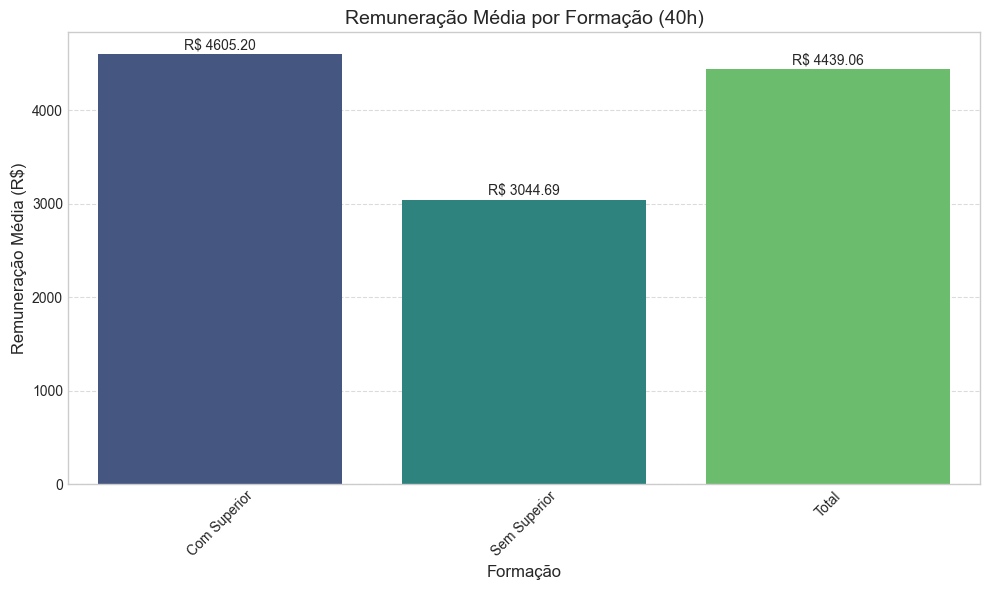

In [11]:
# Remuneração média por formação
media_por_formacao = df.groupby('Formação')['Rem_40h_Final'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Formação', y='Rem_40h_Final', data=media_por_formacao, palette='viridis')
plt.title('Remuneração Média por Formação (40h)', fontsize=14)
plt.xlabel('Formação')
plt.ylabel('Remuneração Média (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores nas barras
for i, row in enumerate(media_por_formacao.itertuples()):
    plt.text(i, row.Rem_40h_Final + 50, f'R$ {row.Rem_40h_Final:.2f}', ha='center')

plt.tight_layout()
plt.show()

### Principais Insights:

1. **Desigualdade Regional**: Identificamos uma clara disparidade na remuneração docente entre as regiões brasileiras, com as regiões Sudeste e Sul apresentando os maiores valores médios.

2. **Redes de Ensino**: A diferença entre as redes pública e privada varia significativamente conforme a região, sendo que em algumas regiões a rede pública oferece remuneração superior.

3. **Impacto da Formação**: Docentes com formação superior recebem remuneração consideravelmente maior em todas as regiões, mas a magnitude dessa diferença varia regionalmente.

4. **Coeficiente de Variação**: As regiões apresentam diferentes níveis de dispersão salarial interna, indicando que algumas têm políticas mais uniformes que outras.

5. **Relação com a Média Nacional**: Identificamos quais regiões estão acima e abaixo da média nacional, quantificando essas diferenças percentualmente.